# Models and Performance

This notebook is dedicated to iterating various models on the engineering features, with the goals of finding the best predictive model.

Note that we will exahustively run models without much analysis. Our insights will be in the next notebook for the best performing model.

## Library Imports

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## workflow
from sklearn.model_selection import GridSearchCV

## models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier

## metrics
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, 
                            ConfusionMatrixDisplay, plot_roc_curve, roc_auc_score, classification_report, RocCurveDisplay)

In [2]:
%run 00_Workflow_Functions.ipynb import na_only, make_model

In [608]:
# recovering train and test data
%store -r stored_data

### Logistic Regression

Alias: Kronk

In [10]:
lr = LogisticRegression(max_iter=1_000, random_state=14)

In [11]:
make_model(lr, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9983844911147012
        Test Accuracy Score: 0.7366720516962844
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.35570469798657717
        Specificity: 0.8574468085106383
        Precision: 0.44166666666666665
        
        Balance Accuracy: 0.6065757532486077
        F1 Score: 0.3940520446096654
        


In [12]:
kronk_coefs = pd.DataFrame(lr.coef_[0], index=X_train_cvec.columns)
kronk_coefs.sort_values(by=0, ascending=False)

,0
hack,1.316535
tried,1.203418
tips,1.167859
oil,0.963483
any,0.821774
...,...
people,-0.749673
money,-0.827517
often,-0.844439
many,-0.859666


In [14]:
lr_gs = GridSearchCV(
    LogisticRegression(max_iter=1_000, random_state=14),
    param_grid={
        'C': [1, 5, 10]
    },
    n_jobs=-1
)
lr_gs

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=14),
             n_jobs=-1, param_grid={'C': [1, 5, 10]})

In [15]:
make_model(lr_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9983844911147012
        Test Accuracy Score: 0.7366720516962844
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.35570469798657717
        Specificity: 0.8574468085106383
        Precision: 0.44166666666666665
        
        Balance Accuracy: 0.6065757532486077
        F1 Score: 0.3940520446096654
        


In [17]:
lr_gs.best_params_

{'C': 1}

In [244]:
make_model(lr_gs, X_train_cvec2, X_test_cvec2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9919224555735057
        Test Accuracy Score: 0.752827140549273
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.3221476510067114
        Specificity: 0.8893617021276595
        Precision: 0.48
        
        Balance Accuracy: 0.6057546765671855
        F1 Score: 0.38554216867469876
        


In [245]:
make_model(lr_gs, X_train_cvec3, X_test_cvec3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 1.0
        Test Accuracy Score: 0.7657512116316639
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.0738255033557047
        Specificity: 0.9851063829787234
        Precision: 0.6111111111111112
        
        Balance Accuracy: 0.5294659431672141
        F1 Score: 0.1317365269461078
        


In [246]:
make_model(lr_gs, X_train_cvec4, X_test_cvec4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9859989229940764
        Test Accuracy Score: 0.752827140549273
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.31543624161073824
        Specificity: 0.8914893617021277
        Precision: 0.47959183673469385
        
        Balance Accuracy: 0.603462801656433
        F1 Score: 0.38056680161943324
        


In [465]:
make_model(lr_gs, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9633817985998923
        Test Accuracy Score: 0.7657512116316639
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.3691275167785235
        Specificity: 0.8914893617021277
        Precision: 0.5188679245283019
        
        Balance Accuracy: 0.6303084392403255
        F1 Score: 0.43137254901960786
        


In [507]:
make_model(lr_gs, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9633817985998923
        Test Accuracy Score: 0.7657512116316639
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.3691275167785235
        Specificity: 0.8914893617021277
        Precision: 0.5188679245283019
        
        Balance Accuracy: 0.6303084392403255
        F1 Score: 0.43137254901960786
        


## WINNNER

In [587]:
lr_gs2 = GridSearchCV(
    LogisticRegression(max_iter=1_000, random_state=14),
    param_grid={
        'C': [1, 5, 10],
        'class_weight': [None, 'balanced']
    },
    scoring='f1', #'f1',
    n_jobs=-1
)
lr_gs2

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=14),
             n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'class_weight': [None, 'balanced']},
             scoring='f1')

In [600]:
make_model(lr_gs2, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9966629588431591
        Test Accuracy Score: 0.43506493506493504
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.44966442953020136
        Specificity: 0.8042553191489362
        Precision: 0.42138364779874216
        
        Balance Accuracy: 0.6269598743395688
        F1 Score: 0.43506493506493504
        


In [589]:
make_model(lr_gs2, X_train_cvec2, X_test_cvec2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9977728285077951
        Test Accuracy Score: 0.4135593220338983
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.40939597315436244
        Specificity: 0.8191489361702128
        Precision: 0.4178082191780822
        
        Balance Accuracy: 0.6142724546622876
        F1 Score: 0.4135593220338983
        


In [590]:
make_model(lr_gs2, X_train_cvec3, X_test_cvec3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9988851727982163
        Test Accuracy Score: 0.1724137931034483
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.10067114093959731
        Specificity: 0.9787234042553191
        Precision: 0.6
        
        Balance Accuracy: 0.5396972725974583
        F1 Score: 0.1724137931034483
        


In [591]:
make_model(lr_gs2, X_train_cvec4, X_test_cvec4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9944506104328523
        Test Accuracy Score: 0.4067796610169491
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.40268456375838924
        Specificity: 0.8170212765957446
        Precision: 0.410958904109589
        
        Balance Accuracy: 0.6098529201770669
        F1 Score: 0.4067796610169491
        


In [617]:
make_model(lr_gs2, X_train_tf, X_test_tf, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.847457627118644
        Test Accuracy Score: 0.5285285285285286
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.5906040268456376
        Specificity: 0.7957446808510639
        Precision: 0.4782608695652174
        
        Balance Accuracy: 0.6931743538483508
        F1 Score: 0.5285285285285286
        


In [621]:
best_model = lr_gs2.best_estimator_

In [592]:
make_model(lr_gs2, X_train_tf2, X_test_tf2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9026178010471205
        Test Accuracy Score: 0.4999999999999999
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.5369127516778524
        Specificity: 0.8063829787234043
        Precision: 0.4678362573099415
        
        Balance Accuracy: 0.6716478652006284
        F1 Score: 0.4999999999999999
        


In [593]:
make_model(lr_gs2, X_train_tf3, X_test_tf3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.897119341563786
        Test Accuracy Score: 0.46645367412140576
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.4899328859060403
        Specificity: 0.8063829787234043
        Precision: 0.4451219512195122
        
        Balance Accuracy: 0.6481579323147223
        F1 Score: 0.46645367412140576
        


In [594]:
make_model(lr_gs2, X_train_tf4, X_test_tf4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.7276119402985074
        Test Accuracy Score: 0.47457627118644063
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.5637583892617449
        Specificity: 0.7425531914893617
        Precision: 0.4097560975609756
        
        Balance Accuracy: 0.6531557903755534
        F1 Score: 0.47457627118644063
        


In [595]:
make_model(lr_gs2, X_train_tf5, X_test_tf5, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.6975023126734505
        Test Accuracy Score: 0.42979942693409745
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.5033557046979866
        Specificity: 0.7340425531914894
        Precision: 0.375
        
        Balance Accuracy: 0.618699128944738
        F1 Score: 0.42979942693409745
        


In [596]:
make_model(lr_gs2, X_train_lt, X_test_lt, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9955555555555555
        Test Accuracy Score: 0.47138047138047134
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.4697986577181208
        Specificity: 0.8340425531914893
        Precision: 0.47297297297297297
        
        Balance Accuracy: 0.651920605454805
        F1 Score: 0.47138047138047134
        


In [528]:
make_model(lr_gs2, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9888392857142857
        Test Accuracy Score: 0.47651006711409394
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.47651006711409394
        Specificity: 0.7957446808510639
        Precision: 0.4251497005988024
        
        Balance Accuracy: 0.6361273739825789
        F1 Score: 0.44936708860759494
        


In [597]:
make_model(lr_gs2, X_train_lt3, X_test_lt3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9921787709497206
        Test Accuracy Score: 0.39846743295019155
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.348993288590604
        Specificity: 0.8723404255319149
        Precision: 0.4642857142857143
        
        Balance Accuracy: 0.6106668570612594
        F1 Score: 0.39846743295019155
        


In [598]:
make_model(lr_gs2, X_train_lt4, X_test_lt4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.5057251908396947
        Test Accuracy Score: 0.3687150837988827
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.4429530201342282
        Specificity: 0.6957446808510638
        Precision: 0.3157894736842105
        
        Balance Accuracy: 0.569348850492646
        F1 Score: 0.3687150837988827
        


In [529]:
lr_gs2.best_params_

{'C': 1, 'class_weight': 'balanced'}

In [543]:
kronk_coefs2 = pd.DataFrame(lr_gs2.best_estimator_.coef_[0], index=X_train_lt2.columns)
top_kronk_coefs = kronk_coefs2.sort_values(by=0, ascending=False)
top_kronk_coefs[:10]

,0
hack,2.209486
plug,1.511174
auto=webp,1.398988
hiccup,1.287466
slide,1.237272
reminder,1.203358
idk,1.191087
glove,1.159934
fly,1.139974
pop,1.136626


In [551]:
list(top_kronk_coefs.index)[:10]

['hack',
 'plug',
 'auto=webp',
 'hiccup',
 'slide',
 'reminder',
 'idk',
 'glove',
 'fly',
 'pop']

In [574]:
top_kronk_coefs[0].values[:10]

array([2.20948566, 1.51117434, 1.39898814, 1.28746568, 1.23727211,
       1.20335831, 1.19108661, 1.1599337 , 1.13997376, 1.13662579])

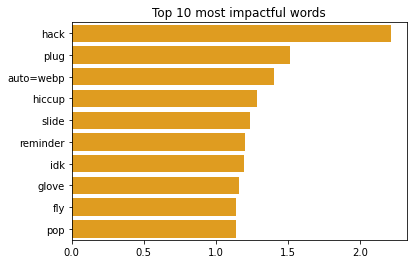

In [580]:
sns.barplot(y=list(top_kronk_coefs.index)[:10], x=top_kronk_coefs[0].values[:10], orient='h', color='orange')
plt.title("Top 10 most impactful words")
#plt.xlabel='Score'
plt.savefig('../images/top_10.png');

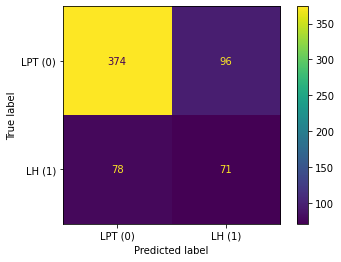

In [586]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_gs2.best_estimator_, X_test_lt2, y_test_encoded, display_labels=['LPT (0)', 'LH (1)'])
#plt.savefig("../images/confusion_matrix.png");

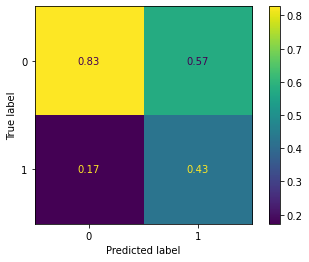

In [532]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_gs2.best_estimator_, X_test_lt2, y_test_encoded, normalize='pred')
#plt.savefig("../images/confusion_matrix.png");

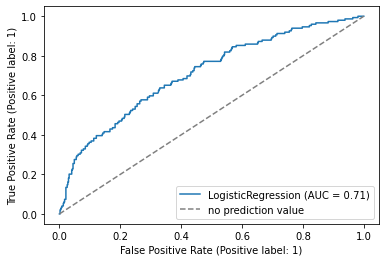

In [535]:
# most current method in scikit-learn is RocCurveDisplay
RocCurveDisplay.from_estimator(lr_gs2.best_estimator_, X_test_lt2, y_test_encoded)

# add 'worst case scenario' line
plt.plot([0,1], [0,1], label='no prediction value', linestyle='--', color='gray')

# add a legend
plt.legend()
plt.savefig("../images/roc_curve.png");

-----

In [508]:
lr_gs.best_params_

{'C': 1}

In [486]:
make_model(lr_gs, X_train_lt4, X_test_lt4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.8529886914378029
        Test Accuracy Score: 0.7576736672051696
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.15436241610738255
        Specificity: 0.948936170212766
        Precision: 0.48936170212765956
        
        Balance Accuracy: 0.5516492931600743
        F1 Score: 0.2346938775510204
        


In [506]:
make_model(lr_gs, X_train_lt4, X_test_lt4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.7689822294022617
        Test Accuracy Score: 0.7576736672051696
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.040268456375838924
        Specificity: 0.9851063829787234
        Precision: 0.46153846153846156
        
        Balance Accuracy: 0.5126874196772812
        F1 Score: 0.07407407407407406
        


In [ ]:
lr_gs2 = GridSearchCV(
    LogisticRegression(penalty='l1', max_iter=1_000, random_state=14, solver='saga'),
    param_grid={
        'C': [0.1, 0.5, 1]
    },
    n_jobs=-1
)
lr_gs2

In [ ]:
#make_model(lr_gs2, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)

### K-Nearest-Neighbors

Alisas: Kuzko

In [44]:
knn = KNeighborsClassifier(n_jobs=-1)

In [73]:
make_model(knn, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.8056004308023694
        Test Accuracy Score: 0.7221324717285945
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.24161073825503357
        Specificity: 0.874468085106383
        Precision: 0.37894736842105264
        
        Balance Accuracy: 0.5580394116807083
        F1 Score: 0.29508196721311475
        


In [30]:
knn_gs = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1),
    param_grid={
        'n_neighbors': [5, 20, 25, 30, 35]
    },
    n_jobs=-1
)
knn_gs

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [20, 25, 30, 35]})

In [31]:
make_model(knn_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.7587506731287023
        Test Accuracy Score: 0.7576736672051696
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.006711409395973154
        Specificity: 0.9957446808510638
        Precision: 0.3333333333333333
        
        Balance Accuracy: 0.5012280451235185
        F1 Score: 0.013157894736842106
        


In [32]:
knn_gs.best_params_

{'n_neighbors': 30}

### Bagging Classifier

Alias: Yzma

In [59]:
bc = BaggingClassifier(random_state=14, n_jobs=-1)

In [74]:
make_model(bc, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.975767366720517
        Test Accuracy Score: 0.7625201938610663
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.1476510067114094
        Specificity: 0.9574468085106383
        Precision: 0.5238095238095238
        
        Balance Accuracy: 0.5525489076110239
        F1 Score: 0.23036649214659685
        


Looks like Yzma model is making less predictions of `r/lifehacks`; however, the few that it does predict, it's getting more of those correct, hence why our precision score has increased.
Slight improvement over the Kuzko model.

In [34]:
bc_gs = GridSearchCV(
    BaggingClassifier(random_state=14, n_jobs=-1),
    param_grid={
        'n_estimators' : [5, 10, 25, 50, 100],
        'bootstrap_features': [False, True]
    },
    n_jobs=-1
)
bc_gs

GridSearchCV(estimator=BaggingClassifier(n_jobs=-1, random_state=14), n_jobs=-1,
             param_grid={'bootstrap_features': [False, True],
                         'n_estimators': [5, 10, 25, 50, 100]})

In [35]:
make_model(bc_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9983844911147012
        Test Accuracy Score: 0.7625201938610663
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.1610738255033557
        Specificity: 0.9531914893617022
        Precision: 0.5217391304347826
        
        Balance Accuracy: 0.5571326574325289
        F1 Score: 0.24615384615384617
        


In [36]:
bc_gs.best_params_

{'bootstrap_features': False, 'n_estimators': 50}

### Random Forests

Alias: Pacha

In [77]:
rf = RandomForestClassifier(random_state=14, n_jobs=-1)

In [78]:
make_model(rf, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 1.0
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.06711409395973154
        Specificity: 0.9936170212765958
        Precision: 0.7692307692307693
        
        Balance Accuracy: 0.5303655576181636
        F1 Score: 0.12345679012345678
        


Our recall has gone down significantly, which indicates very few predictions for `r/lifehacks` were made. The few predictions that were made about `r/lifehacks` were mostly correct, which is why we have a relatively high precision score.

Making few predictoins for `r/lifehacks` is not ideal for us. Does not outperform Yzma model.

In [38]:
rf_gs = GridSearchCV(
    RandomForestClassifier(random_state=14, n_jobs=-1),
    param_grid={
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 3, 5]
    },
    n_jobs=-1
)
rf_gs

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=14),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 200]})

In [39]:
make_model(rf_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 1.0
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.06711409395973154
        Specificity: 0.9936170212765958
        Precision: 0.7692307692307693
        
        Balance Accuracy: 0.5303655576181636
        F1 Score: 0.12345679012345678
        


In [40]:
rf_gs.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [60]:
pd.DataFrame(rf_gs.best_estimator_.feature_importances_, index=X_train_cvec.columns).sort_values(by=0, ascending=False)

,0
hack,0.007384
you,0.006622
tried,0.004729
to,0.004566
https,0.004552
...,...
couldnt,0.000000
offhand,0.000000
counselors,0.000000
offensive,0.000000


### Extra Trees

Alias: Chaca

In [81]:
et = ExtraTreesClassifier(random_state=14, n_jobs=-1)

In [82]:
make_model(et, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 1.0
        Test Accuracy Score: 0.778675282714055
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.12080536912751678
        Specificity: 0.9872340425531915
        Precision: 0.75
        
        Balance Accuracy: 0.5540197058403541
        F1 Score: 0.20809248554913296
        


Higher recall score than Pacha model (makes more `r/lifehacks` predictions) while maintaining essentially the same precision score (same correct/incorrect ratio predictions of `r/lifehacks`). This is a slight imporovement of the Pacha and Yzma model. 

In [41]:
et_gs = GridSearchCV(
    ExtraTreesClassifier(random_state=14, n_jobs=-1),
    param_grid={
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 3, 5]
    },
    n_jobs=-1
)
et_gs

GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=14),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 200]})

In [42]:
make_model(et_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 1.0
        Test Accuracy Score: 0.778675282714055
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.12080536912751678
        Specificity: 0.9872340425531915
        Precision: 0.75
        
        Balance Accuracy: 0.5540197058403541
        F1 Score: 0.20809248554913296
        


In [61]:
pd.DataFrame(et_gs.best_estimator_.feature_importances_, index=X_train_cvec.columns).sort_values(by=0, ascending=False)

,0
hack,0.008882
hacks,0.005128
tried,0.004048
tips,0.003809
you,0.003743
...,...
cosmic,0.000000
costco,0.000000
costing,0.000000
proxy,0.000000


### Ada Boost Classifier

Alias: Tipo

In [85]:
abc = AdaBoostClassifier(random_state=14)

In [86]:
make_model(abc, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.8136779752288638
        Test Accuracy Score: 0.7576736672051696
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.28859060402684567
        Specificity: 0.9063829787234042
        Precision: 0.4942528735632184
        
        Balance Accuracy: 0.597486791375125
        F1 Score: 0.3644067796610169
        


It appears more predictions were made for `r/lifehacks` (higher recall score) but the amount of correct predictions went down (lower precision score). Our F1 score is only second to the Kronk model.

In [44]:
abc_gs = GridSearchCV(
    AdaBoostClassifier(random_state=14),
    param_grid={
        'n_estimators': [50, 100, 150, 200, 250]
    },
    n_jobs=-1
)
abc_gs

GridSearchCV(estimator=AdaBoostClassifier(random_state=14), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250]})

In [45]:
make_model(abc_gs, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.8933764135702746
        Test Accuracy Score: 0.7447495961227787
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.30201342281879195
        Specificity: 0.8851063829787233
        Precision: 0.45454545454545453
        
        Balance Accuracy: 0.5935599028987577
        F1 Score: 0.3629032258064516
        


In [46]:
abc_gs.best_params_

{'n_estimators': 150}

In [62]:
pd.DataFrame(abc_gs.best_estimator_.feature_importances_, index=X_train_cvec.columns).sort_values(by=0, ascending=False)

,0
at,0.020000
often,0.013333
tips,0.013333
time,0.013333
be,0.013333
...,...
eyeball,0.000000
eyebrow,0.000000
eyeglasses,0.000000
eyeing,0.000000


In [357]:
make_model(abc_gs, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.8551427032848681
        Test Accuracy Score: 0.7560581583198708
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.28859060402684567
        Specificity: 0.9042553191489362
        Precision: 0.48863636363636365
        
        Balance Accuracy: 0.5964229615878909
        F1 Score: 0.3628691983122363
        


-----

Now that we have found the best estimators in our gridsearches, let's ensemble all our models for the best possible classifications.

In [238]:
vr = VotingClassifier(
    [
        ('lr_vr', lr_gs.best_estimator_),
        ('knn_vr', knn_gs.best_estimator_),
        ('bc_vr', bc_gs.best_estimator_),
        ('rf_vr', rf_gs.best_estimator_),
        ('et_vr', et_gs.best_estimator_),
        ('abc_vr', abc_gs.best_estimator_)
    ],
    n_jobs=-1,
)
vr

VotingClassifier(estimators=[('lr_vr',
                              LogisticRegression(C=1, max_iter=1000,
                                                 random_state=14)),
                             ('knn_vr',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=30)),
                             ('bc_vr',
                              BaggingClassifier(n_estimators=50, n_jobs=-1,
                                                random_state=14)),
                             ('rf_vr',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=14)),
                             ('et_vr',
                              ExtraTreesClassifier(n_jobs=-1, random_state=14)),
                             ('abc_vr',
                              AdaBoostClassifier(n_estimators=150,
                                                 random_state=14))],
                 n_jobs=-1)

In [241]:
make_model(vr, X_train_cvec, X_test_cvec, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9967689822294022
        Test Accuracy Score: 0.777059773828756
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.10067114093959731
        Specificity: 0.9914893617021276
        Precision: 0.7894736842105263
        
        Balance Accuracy: 0.5460802513208625
        F1 Score: 0.17857142857142858
        


In [240]:
make_model(vr, X_train_cvec2, X_test_cvec2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9913839526117394
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.1342281879194631
        Specificity: 0.9723404255319149
        Precision: 0.6060606060606061
        
        Balance Accuracy: 0.553284306725689
        F1 Score: 0.21978021978021978
        


In [242]:
make_model(vr, X_train_cvec3, X_test_cvec3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9924609585352719
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.06040268456375839
        Specificity: 0.9957446808510638
        Precision: 0.8181818181818182
        
        Balance Accuracy: 0.5280736827074111
        F1 Score: 0.1125
        


In [243]:
make_model(vr, X_train_cvec4, X_test_cvec4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9859989229940764
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.18120805369127516
        Specificity: 0.9574468085106383
        Precision: 0.574468085106383
        
        Balance Accuracy: 0.5693274311009567
        F1 Score: 0.2755102040816327
        


-----

In [514]:
vr2 = VotingClassifier(
    [
        ('lr2_vr', lr_gs2.best_estimator_),
        ('rf_vr', rf_gs.best_estimator_),
        ('abc_vr', abc_gs.best_estimator_)
    ],
    n_jobs=-1
)
vr2

VotingClassifier(estimators=[('lr2_vr',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=14)),
                             ('rf_vr',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=14)),
                             ('abc_vr',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=14))],
                 n_jobs=-1)

In [260]:
make_model(vr, X_train_tf, X_test_tf, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9477652127086699
        Test Accuracy Score: 0.7722132471728594
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.087248322147651
        Specificity: 0.9893617021276596
        Precision: 0.7222222222222222
        
        Balance Accuracy: 0.5383050121376554
        F1 Score: 0.15568862275449102
        


In [268]:
make_model(vr, X_train_tf2, X_test_tf2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.946149703823371
        Test Accuracy Score: 0.7689822294022617
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.087248322147651
        Specificity: 0.9851063829787234
        Precision: 0.65
        
        Balance Accuracy: 0.5361773525631872
        F1 Score: 0.15384615384615385
        


In [274]:
make_model(vr, X_train_tf3, X_test_tf3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9407646742057081
        Test Accuracy Score: 0.7705977382875606
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.12751677852348994
        Specificity: 0.9744680851063829
        Precision: 0.6129032258064516
        
        Balance Accuracy: 0.5509924318149364
        F1 Score: 0.21111111111111114
        


In [286]:
make_model(vr, X_train_tf4, X_test_tf4, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.929456112008616
        Test Accuracy Score: 0.7689822294022617
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.14093959731543623
        Specificity: 0.9680851063829787
        Precision: 0.5833333333333334
        
        Balance Accuracy: 0.5545123518492074
        F1 Score: 0.22702702702702704
        


In [302]:
make_model(vr, X_train_tf5, X_test_tf5, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9116855142703285
        Test Accuracy Score: 0.7560581583198708
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.06711409395973154
        Specificity: 0.9744680851063829
        Precision: 0.45454545454545453
        
        Balance Accuracy: 0.5207910895330572
        F1 Score: 0.11695906432748539
        


-----

In [355]:
make_model(vr, X_train_lt, X_test_lt, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.996230479267636
        Test Accuracy Score: 0.7657512116316639
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.053691275167785234
        Specificity: 0.9914893617021276
        Precision: 0.6666666666666666
        
        Balance Accuracy: 0.5225903184349564
        F1 Score: 0.09937888198757763
        


In [369]:
make_model(vr, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.96661281637049
        Test Accuracy Score: 0.778675282714055
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.2348993288590604
        Specificity: 0.951063829787234
        Precision: 0.603448275862069
        
        Balance Accuracy: 0.5929815793231472
        F1 Score: 0.33816425120772947
        


In [363]:
make_model(vr, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9644588045234249
        Test Accuracy Score: 0.7625201938610663
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.24161073825503357
        Specificity: 0.9276595744680851
        Precision: 0.5142857142857142
        
        Balance Accuracy: 0.5846351563615594
        F1 Score: 0.3287671232876712
        


In [464]:
make_model(vr, X_train_lt3, X_test_lt3, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.975767366720517
        Test Accuracy Score: 0.7657512116316639
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.1610738255033557
        Specificity: 0.9574468085106383
        Precision: 0.5454545454545454
        
        Balance Accuracy: 0.559260317006997
        F1 Score: 0.24870466321243523
        


In [515]:
make_model(vr2, X_train_lt2, X_test_lt2, y_train_encoded, y_test_encoded)


        Training Accuracy Score: 0.9940764674205708
        Test Accuracy Score: 0.7641357027463651
        
        --- Performance on unseen data ----
        Recall (Sensitivity): 0.3087248322147651
        Specificity: 0.9085106382978724
        Precision: 0.5168539325842697
        
        Balance Accuracy: 0.6086177352563187
        F1 Score: 0.3865546218487395
        


In [622]:
# saving train test splits for next notebook
stored_data['best_model'] = best_model

In [623]:
%store stored_data
#del stored_data

Stored 'stored_data' (dict)
